Realize I need to check the raw data traces after data acquisition. While using the pulseblaster,
the AOM and RF pulse response times could be significantly different.

didn't quite get to Rabi

Running with 1mW optical power. Microscope not very well aligned. But still able to see CWODMR


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy import optimize
import copy
from scipy.optimize import leastsq
import scipy 

import logging


In [4]:
import qt3utils.experiments.ramsey
import qt3utils.experiments.cwodmr
import qt3utils.experiments.podmr
import qt3utils.experiments.rabi

from qt3utils.pulsers.pulseblaster import PulseBlasterRamHahnDD, PulseBlasterCWODMR, PulseBlasterPulsedODMR, PulseBlasterHoldAOM, PulseBlasterArb
import qt3utils.nidaq
import qcsapphire
import qt3rfsynthcontrol

import nipiezojenapy
import qt3utils.datagenerators as datasources
import qt3utils.datagenerators.piezoscanner
import qt3utils.nidaq.config

In [5]:
import pickle
def save_file(name, data):
    with open(name, 'wb') as handle:
        pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

def load_file(name):
    with open(name, 'rb') as handle:
        return pickle.load(handle)

In [6]:
logging.basicConfig(level=logging.WARNING)
qt3utils.experiments.cwodmr.logger.setLevel(logging.INFO)
datasources.daqsamplers.logger.setLevel(logging.INFO)

In [7]:
rfsynth = qt3rfsynthcontrol.QT3SynthHD('COM5')

In [8]:
#first, isolate an NV orientation 
cwodmr_pulser = PulseBlasterCWODMR(pb_board_number=0, clock_period = 100e-9)

In [9]:
nidaq_config = qt3utils.nidaq.EdgeCounter('Dev1')

In [10]:
cwodmr_exp = qt3utils.experiments.cwodmr.CWODMR(cwodmr_pulser, rfsynth, nidaq_config,
                                                  rf_power=-20)

In [11]:
cwodmr_pulser.rf_pulse_duration = 10e-6

In [12]:
cwodmr_exp.experimental_conditions()

{'freq_low': 2820000000.0,
 'freq_high': 2920000000.0,
 'freq_step': 1000000.0,
 'rf_power': -20,
 'pulser': {'rf_pulse_duration': 1e-05, 'clock_period': 1e-07}}

In [13]:
cwodmr_exp.freq_low = 2700e6
cwodmr_exp.freq_high = 3000e6
cwodmr_exp.freq_step = 2e6
cwodmr_exp.rf_power = -10

In [14]:
scan_data = {'data':cwodmr_exp.run(N_cycles=50000), 'conditions':cwodmr_exp.experimental_conditions()}

INFO:qt3utils.experiments.cwodmr:RF frequency: 2700000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2702000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2704000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2706000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2708000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2710000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2712000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2714000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2716000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2718000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2720000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2722000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2724000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2726000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2728000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 27300000

INFO:qt3utils.experiments.cwodmr:RF frequency: 2962000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2964000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2966000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2968000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2970000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2972000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2974000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2976000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2978000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2980000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2982000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2984000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2986000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2988000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2990000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 29920000

<IPython.core.display.Javascript object>


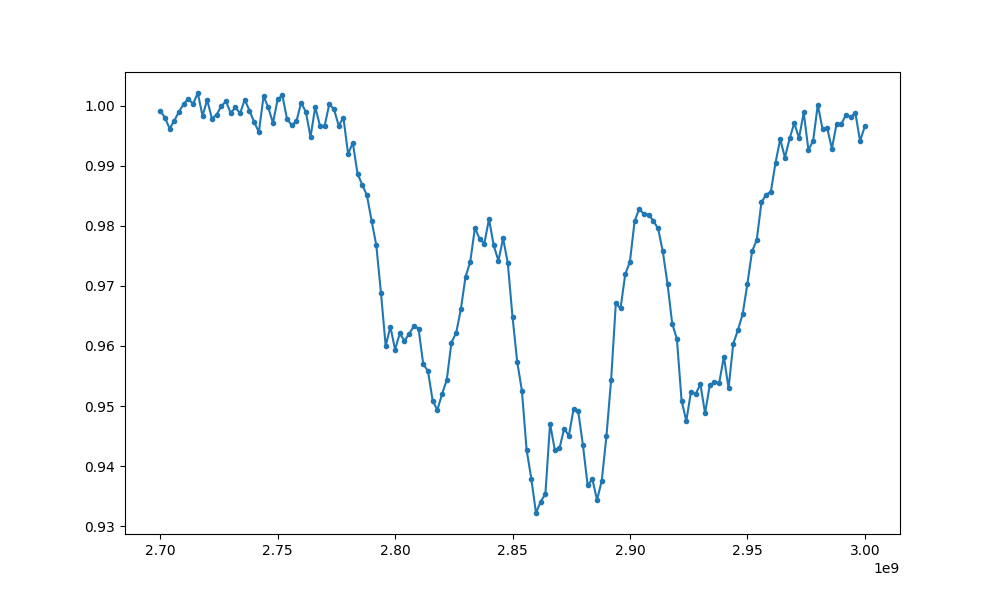

In [16]:
plt.figure(figsize=(10,6))
scan = np.array(scan_data['data'])
x_data = scan[:, 0]
y_data = scan[:, 1]
plt.plot(x_data, y_data, '.-')

In [17]:
#adjusting magnet

In [31]:
cwodmr_exp.freq_low = 2700e6
cwodmr_exp.freq_high = 3050e6
cwodmr_exp.freq_step = 2e6
cwodmr_exp.rf_power = -10

In [36]:
scan_data_pos2 = {'data':cwodmr_exp.run(N_cycles=40000), 'conditions':cwodmr_exp.experimental_conditions()}

INFO:qt3utils.experiments.cwodmr:RF frequency: 2700000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2702000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2704000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2706000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2708000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2710000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2712000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2714000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2716000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2718000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2720000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2722000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2724000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2726000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2728000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 27300000

INFO:qt3utils.experiments.cwodmr:RF frequency: 2962000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2964000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2966000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2968000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2970000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2972000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2974000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2976000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2978000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2980000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2982000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2984000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2986000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2988000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2990000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 29920000

<IPython.core.display.Javascript object>


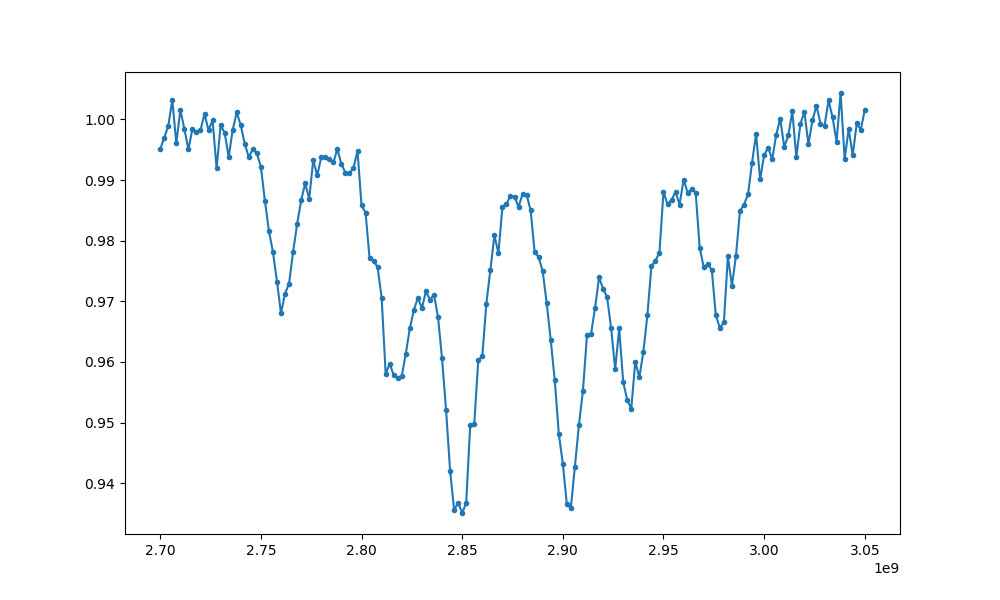

In [37]:
plt.figure(figsize=(10,6))
scan = np.array(scan_data_pos2['data'])
x_data = scan[:, 0]
y_data = scan[:, 1]
plt.plot(x_data, y_data, '.-')

In [41]:
cwodmr_exp.freq_low = 2730e6
cwodmr_exp.freq_high = 2790e6
cwodmr_exp.freq_step = 1e6
cwodmr_exp.rf_power = -10

In [42]:
scan_data_single_orientation = {'data':cwodmr_exp.run(N_cycles=10000), 'conditions':cwodmr_exp.experimental_conditions()}

INFO:qt3utils.experiments.cwodmr:RF frequency: 2730000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2731000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2732000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2733000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2734000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2735000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2736000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2737000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2738000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2739000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2740000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2741000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2742000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2743000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2744000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 27450000

<IPython.core.display.Javascript object>


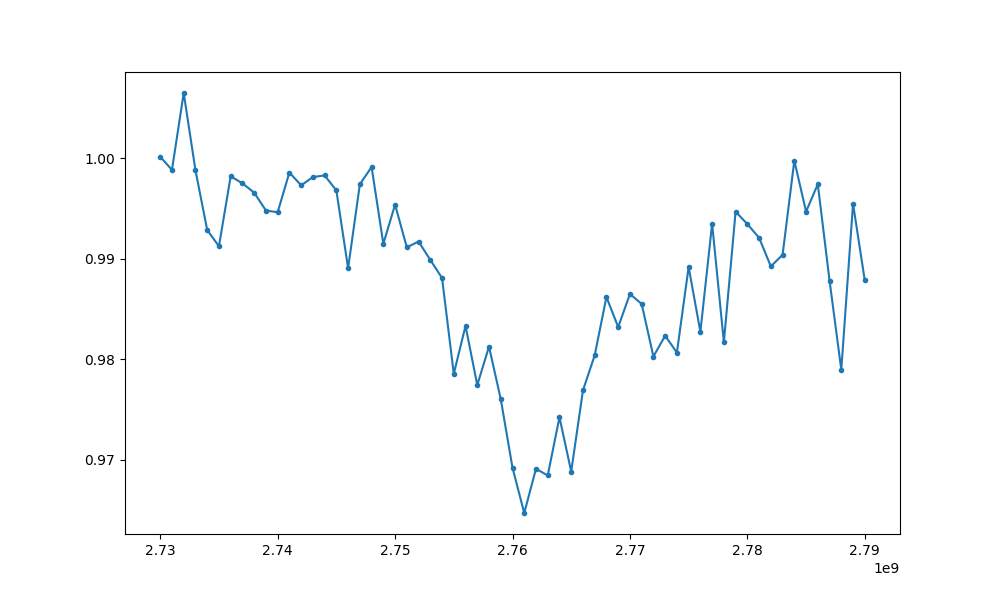

In [43]:
plt.figure(figsize=(10,6))
scan = np.array(scan_data_single_orientation['data'])
x_data = scan[:, 0]
y_data = scan[:, 1]
plt.plot(x_data, y_data, '.-')

In [44]:
cwodmr_exp.freq_low = 2740e6
cwodmr_exp.freq_high = 2780e6
cwodmr_exp.freq_step = 1e6
cwodmr_exp.rf_power = -15

In [45]:
scan_data_single_orientation_m15 = {'data':cwodmr_exp.run(N_cycles=40000), 'conditions':cwodmr_exp.experimental_conditions()}

INFO:qt3utils.experiments.cwodmr:RF frequency: 2740000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2741000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2742000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2743000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2744000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2745000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2746000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2747000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2748000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2749000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2750000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2751000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2752000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2753000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2754000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 27550000

<IPython.core.display.Javascript object>


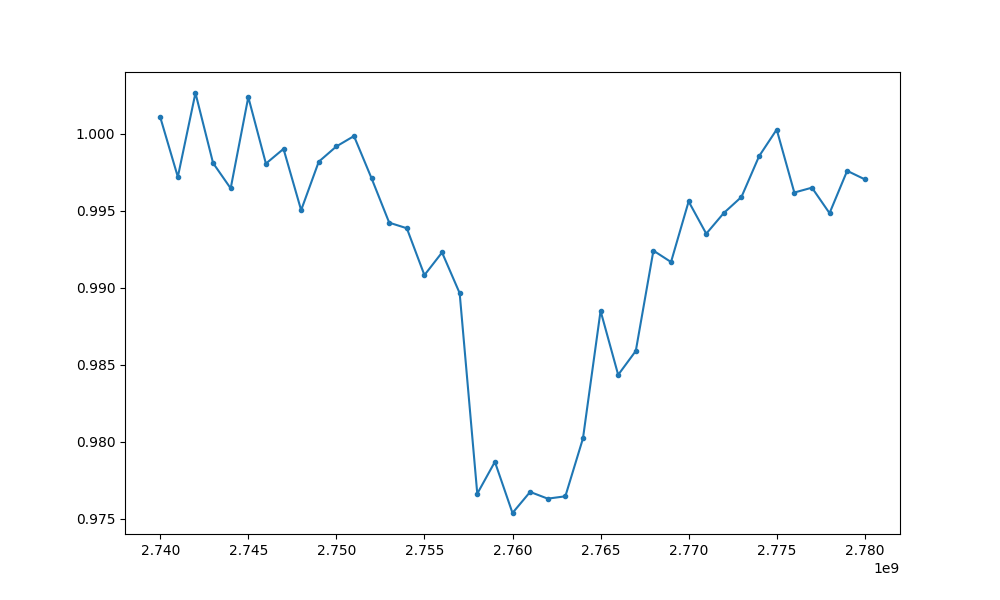

In [46]:
plt.figure(figsize=(10,6))
scan = np.array(scan_data_single_orientation_m15['data'])
x_data = scan[:, 0]
y_data = scan[:, 1]
plt.plot(x_data, y_data, '.-')

In [47]:
cwodmr_exp.freq_low = 2745e6
cwodmr_exp.freq_high = 2775e6
cwodmr_exp.freq_step = 1e6
cwodmr_exp.rf_power = -20

In [50]:
scan_data_single_orientation_m20 = {'data':cwodmr_exp.run(N_cycles=100000), 'conditions':cwodmr_exp.experimental_conditions()}

INFO:qt3utils.experiments.cwodmr:RF frequency: 2745000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2746000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2747000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2748000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2749000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2750000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2751000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2752000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2753000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2754000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2755000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2756000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2757000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2758000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2759000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 27600000

<IPython.core.display.Javascript object>


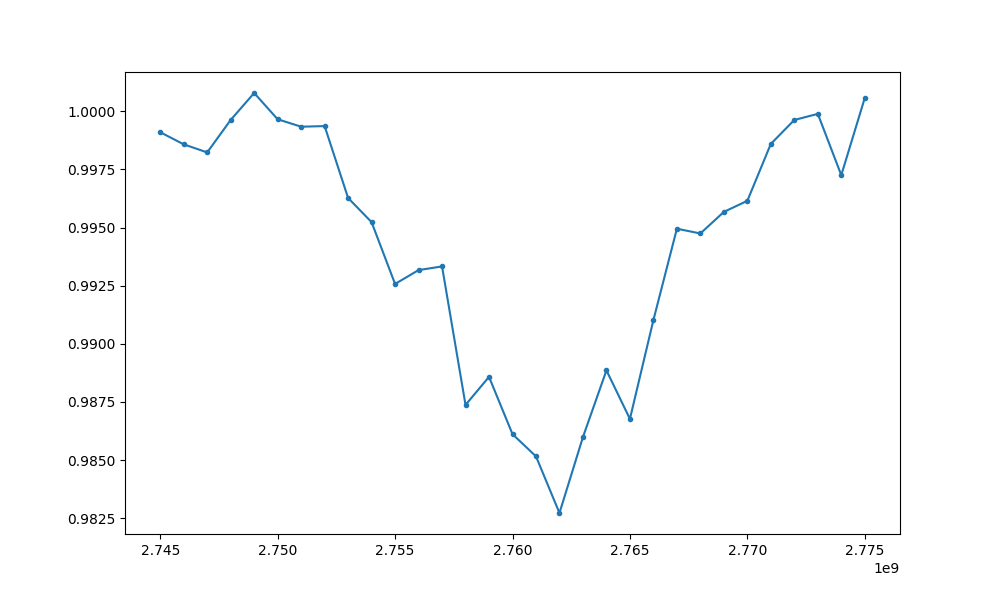

In [51]:
plt.figure(figsize=(10,6))
scan = np.array(scan_data_single_orientation_m20['data'])
x_data = scan[:, 0]
y_data = scan[:, 1]
plt.plot(x_data, y_data, '.-')

In [52]:
cwodmr_exp.freq_low = 2745e6
cwodmr_exp.freq_high = 2775e6
cwodmr_exp.freq_step = .5e6
cwodmr_exp.rf_power = -25

In [55]:
scan_data_single_orientation_m25 = {'data':cwodmr_exp.run(N_cycles=150000), 'conditions':cwodmr_exp.experimental_conditions()}

INFO:qt3utils.experiments.cwodmr:RF frequency: 2745000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2745500000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2746000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2746500000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2747000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2747500000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2748000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2748500000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2749000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2749500000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2750000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2750500000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2751000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2751500000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2752000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 27525000

<IPython.core.display.Javascript object>


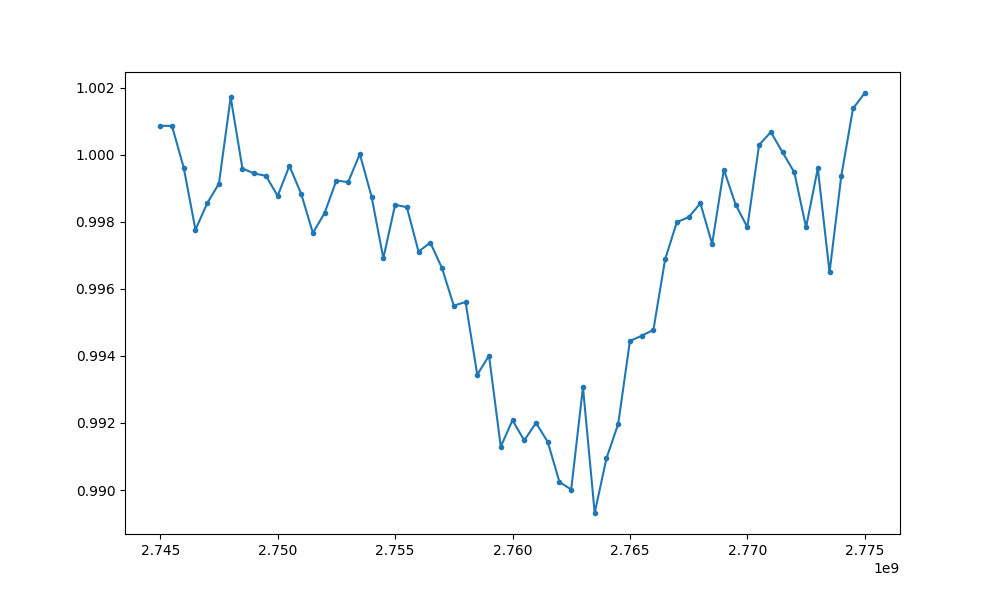

In [56]:
plt.figure(figsize=(10,6))
scan = np.array(scan_data_single_orientation_m25['data'])
x_data = scan[:, 0]
y_data = scan[:, 1]
plt.plot(x_data, y_data, '.-')

In [58]:
cwodmr_exp.freq_low = 2755e6
cwodmr_exp.freq_high = 2770e6
cwodmr_exp.freq_step = .5e6
cwodmr_exp.rf_power = -28

In [59]:
scan_data_single_orientation_m28 = {'data':cwodmr_exp.run(N_cycles=200000), 'conditions':cwodmr_exp.experimental_conditions()}

INFO:qt3utils.experiments.cwodmr:RF frequency: 2755000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2755500000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2756000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2756500000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2757000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2757500000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2758000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2758500000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2759000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2759500000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2760000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2760500000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2761000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2761500000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2762000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 27625000

<IPython.core.display.Javascript object>


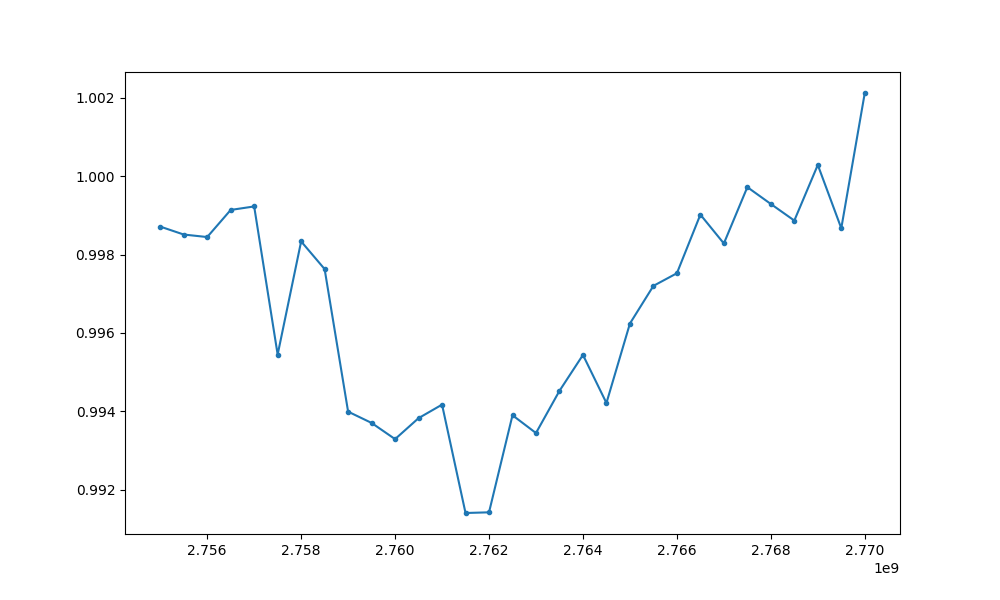

In [60]:
plt.figure(figsize=(10,6))
scan = np.array(scan_data_single_orientation_m28['data'])
x_data = scan[:, 0]
y_data = scan[:, 1]
plt.plot(x_data, y_data, '.-')

In [61]:
#Rabi @ -28

In [64]:
qt3utils.experiments.rabi.Rabi?

In [101]:
podmr_pulser = PulseBlasterPulsedODMR(pb_board_number=0, clock_period = 100e-9)
nidaq_config = qt3utils.nidaq.EdgeCounter('Dev1')
rabi_exp = qt3utils.experiments.rabi.Rabi(podmr_pulser, rfsynth, nidaq_config,
                                                  rf_power=-20, rf_frequency=2762e6)

In [102]:
qt3utils.experiments.rabi.logger.setLevel(logging.INFO)

In [103]:
rabi_exp.experimental_conditions()

{'rf_pulse_duration_low': 1e-07,
 'rf_pulse_duration_high': 1e-05,
 'rf_pulse_duration_step': 5e-08,
 'rf_power': -20,
 'rf_frequency': 2762000000.0,
 'pulser': {'rf_pulse_duration': 5e-06,
  'aom_width': 5e-06,
  'aom_response_time': 8e-07,
  'post_rf_pad': 1e-07,
  'pre_rf_pad': 1e-07,
  'full_cycle_width': 3e-05,
  'rf_pulse_justify': 'center',
  'clock_period': 1e-07}}

In [106]:
rabi_exp.pulser.full_cycle_width = 35e-6
rabi_exp.rf_pulse_duration_step = 50e-9
rabi_exp.rf_pulse_duration_low = 100e-9

In [107]:
rabi_scan = rabi_exp.run()

INFO:qt3utils.experiments.rabi:RF Width: 1e-07 seconds
INFO:qt3utils.experiments.rabi:RF Width: 1.5e-07 seconds
INFO:qt3utils.experiments.rabi:RF Width: 2e-07 seconds
INFO:qt3utils.experiments.rabi:RF Width: 2.5e-07 seconds
INFO:qt3utils.experiments.rabi:RF Width: 3e-07 seconds
INFO:qt3utils.experiments.rabi:RF Width: 3.5e-07 seconds
INFO:qt3utils.experiments.rabi:RF Width: 4e-07 seconds
INFO:qt3utils.experiments.rabi:RF Width: 4.5e-07 seconds
INFO:qt3utils.experiments.rabi:RF Width: 5e-07 seconds
INFO:qt3utils.experiments.rabi:RF Width: 5.5e-07 seconds
INFO:qt3utils.experiments.rabi:RF Width: 6e-07 seconds
INFO:qt3utils.experiments.rabi:RF Width: 6.5e-07 seconds
INFO:qt3utils.experiments.rabi:RF Width: 7e-07 seconds
INFO:qt3utils.experiments.rabi:RF Width: 7.5e-07 seconds
INFO:qt3utils.experiments.rabi:RF Width: 8e-07 seconds
INFO:qt3utils.experiments.rabi:RF Width: 8.5e-07 seconds
INFO:qt3utils.experiments.rabi:RF Width: 9e-07 seconds
INFO:qt3utils.experiments.rabi:RF Width: 9.5e-07 

<IPython.core.display.Javascript object>


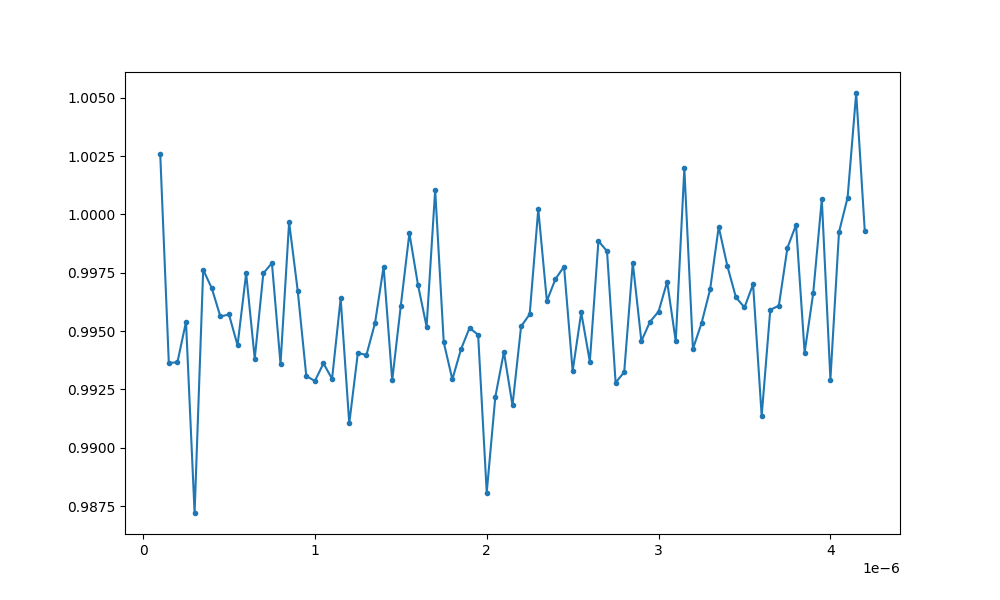

In [108]:
plt.figure(figsize=(10,6))
scan = np.array(rabi_scan)
x_data = scan[:, 0]
y_data = scan[:, 1]
plt.plot(x_data, y_data, '.-')

In [128]:
check_pulser = PulseBlasterPulsedODMR(pb_board_number=0, 
                                      clock_period = 100e-9,
                                      aom_channel = 16, 
                                      rf_channel = 17, 
                                      clock_channel = 18, 
                                      trigger_channel =19)


In [129]:
check_pulser.program_pulser_state(6e-6)

300

In [117]:
check_pulser.start()